<h1>Hadware usado</h1>
Los siguientes modelos fueron corridos en maquinas virtuales de google (cuadernos de IA Platform)

In [1]:
!nvidia-smi

Sun Feb  9 07:13:17 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.87.01    Driver Version: 418.87.01    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    59W / 149W |    230MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

<h2>Librerias</h2>

Se usa libreria <code>datatime</code> para obtener la hora especifica, lo usamos para guardar los modelos periodicamente a medida que lo ibamos entrenando

In [11]:
import pandas as pd
import sys
import os
import numpy as np
import tensorflow as tf
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dropout, Flatten, Dense, Activation, Add,SpatialDropout2D
from tensorflow.python.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.python.keras import backend as K
import PIL

from tensorflow.python.keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import datetime


<h2>Hiperparametros</h2>

In [3]:
#K.image_data_format() CHANNELS_LAST
nb_train_samples = 7947 
nb_validation_samples = 300

train_dir = 'data/train'
dev_dir = 'data/dev'
test_dir = 'data/test'
epochs = 10
width, height = 306, 306
batch_size = 16
steps = nb_train_samples // batch_size
validation_steps = nb_validation_samples // batch_size
#Tamaño profundidad de filtros
filtersConv1 = 32
filtersConv2 = 32
filtersConv3 = 64

#Tamaño de los filtros
filter_size1 = (3,3)
filter_size2 = (3,3)
filter_size3 = (3,3)
#PoolSizes
pool_size1 = (2,2)
pool_size2 = (2,2)
pool_size3 = (2,2)

number_class = 3
learning_rate = 0.005
lr = learning_rate
#Limpiamos sesiones previas
K.clear_session()

filter_convs = [filtersConv1, filtersConv2, filtersConv3]
filter_sizes = [filter_size1, filter_size2, filter_size3]
pool_sizes   = [pool_size1, pool_size2, pool_size3]

 

<h2>Cargando modelo entrenado</h2>
Se selecciona el ultimo modelo generado y se entrena por 10 epocas más

In [3]:
loaded_model= tf.keras.models.load_model('modelo2/modelo.h5')
nb_train_samples = 7629  
nb_validation_samples = 300


epochs = 5
width, height = 306, 306
batch_size = 32
steps = nb_train_samples // batch_size
validation_steps = nb_validation_samples // batch_size

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.2,0.8],
    rotation_range=20,
)
    

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(width, height),
    batch_size=batch_size,
    class_mode='categorical')
    
validation_generator = test_datagen.flow_from_directory(
    dev_dir,
    target_size=(width, height),
    batch_size=batch_size,
    class_mode='categorical')
    
 

Found 7629 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [9]:
loaded_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics = ['accuracy', 'mean_squared_error'])
history = loaded_model.fit_generator(
        train_generator,
        steps_per_epoch=steps,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples // batch_size,
        use_multiprocessing=True,
        workers = 8
    )



Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 496 steps, validate for 18 steps
Epoch 1/10
496/496 [==============================] - 233s 470ms/step - loss: 0.5406 - accuracy: 0.7669 - mean_squared_error: 0.1054 - val_loss: 0.5943 - val_accuracy: 0.7222 - val_mean_squared_error: 0.1214
Epoch 2/10
496/496 [==============================] - 216s 436ms/step - loss: 0.5406 - accuracy: 0.7605 - mean_squared_error: 0.1057 - val_loss: 0.5700 - val_accuracy: 0.7257 - val_mean_squared_error: 0.1130
Epoch 3/10
496/496 [==============================] - 223s 450ms/step - loss: 0.5372 - accuracy: 0.7618 - mean_squared_error: 0.1057 - val_loss: 0.5420 - val_accuracy: 0.7535 - val_mean_squared_error: 0.1084
Epoch 4/10
496/496 [==============================] - 223s 451ms/step - loss: 0.5363 - accuracy: 0.7673 - mean_squared_error: 0.1053 - val_loss: 0.5440 - val_accuracy: 0.7708 - val_mean_squared_error: 0.1065

NameError: name 'cnn' is not defined

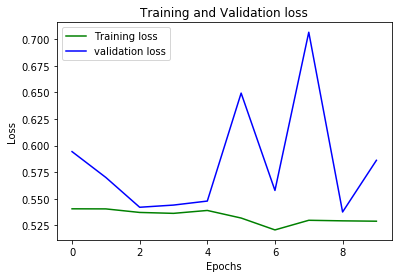

In [11]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
img = plt.gcf()
plt.plot(range(0,epochs), loss_train, 'g', label='Training loss')
plt.plot(range(0,epochs), loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

img.savefig('next_to_send/images_old_model/training_lost_last.png')

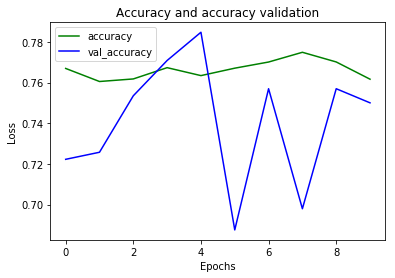

In [14]:
import matplotlib.pyplot as plt
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
img = plt.gcf()
plt.plot(range(0,epochs), loss_train, 'g', label='accuracy')
plt.plot(range(0,epochs), loss_val, 'b', label='val_accuracy')
plt.title('Accuracy and accuracy validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
img.savefig('next_to_send/images_old_model/accuracy_last.png')

<h2>Test</h2>
Probamos el modelo con un conjunto de etiquetas propio

In [15]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(306, 306),
        class_mode='categorical',
)

Found 310 images belonging to 3 classes.


In [16]:
pred = loaded_model.evaluate(test_generator)

  ...
    to  
  ['...']
10/10 [==============================] - 2s 208ms/step - loss: 0.6812 - accuracy: 0.6968 - mean_squared_error: 0.1324


<h2>modelo con más capas</h2>

In [4]:
def new_model(input_shape, filter_convs, filter_sizes, pool_sizes):
    width, height = input_shape[0], input_shape[1] 
    if K.image_data_format() == 'channels_first':
        input_shape = (3, width, height)
    else:
        input_shape = (width, height, 3)

    network =Sequential()
    print(input_shape)
    network.add(Dropout(0.5, input_shape=input_shape))
    #first layer
    network.add(Convolution2D( filter_convs[0],
                               filter_sizes[0], 
                               padding='same', 
                               #input_shape = input_shape,
                               activation='relu'
                             ))
    network.add(MaxPooling2D(pool_size=pool_sizes[0]))
    
    #Second layer
    network.add(Convolution2D( filter_convs[1],
                               filter_sizes[1],  
                               activation='relu'
                             ))
    network.add(MaxPooling2D(pool_size=pool_sizes[1]))
    
    #third layer
    network.add(Convolution2D( filter_convs[2],
                               filter_sizes[2], 
                               activation='relu'
                             ))
    
    network.add(MaxPooling2D(pool_size=pool_sizes[2]))
    
    
    #fourth layer
    network.add(Convolution2D( filter_convs[3],
                               filter_sizes[3], 
                               padding='same', 
                               input_shape = input_shape,
                               activation='relu'
                             ))
    network.add(MaxPooling2D(pool_size=pool_sizes[3]))
    #fourth layer
    network.add(Convolution2D( 128,
                               filter_sizes[3], 
                               padding='same', 
                               input_shape = input_shape,
                               activation='relu'
                             ))
    network.add(MaxPooling2D(pool_size=pool_sizes[3]))
    
    
    
    network.add(Flatten())
    network.add(Dense(128))
    network.add(Activation('relu'))
    network.add(Dropout(0.5))
    network.add(Dense(3))
    network.add(Activation('softmax'))



    
    return network

<h2>Hiperparametros del nuevo modelo </h2>

In [4]:
#K.image_data_format() CHANNELS_LAST
nb_train_samples = 7629 
nb_validation_samples = 300

train_dir = 'data/train'
dev_dir = 'data/dev'
test_dir = 'data/test'
epochs = 10
width, height = 306, 306
batch_size = 16
steps = nb_train_samples // batch_size
validation_steps = nb_validation_samples // batch_size
#Tamaño profundidad de filtros
filtersConv1 = 32
filtersConv2 = 32
filtersConv3 = 64
filtersConv4 = 64
filtersConv5 = 128



#Tamaño de los filtros
filter_size1 = (3,3)
filter_size2 = (3,3)
filter_size3 = (3,3)
filter_size4 = (3,3)
filter_size5 = (3,3)
#PoolSizes
pool_size1 = (2,2)
pool_size2 = (2,2)
pool_size3 = (2,2)
pool_size4 = (2,2)
pool_size5 = (2,2)

number_class = 3
learning_rate = 0.005
lr = learning_rate
#Limpiamos sesiones previas
K.clear_session()

filter_convs = [filtersConv1, filtersConv2, filtersConv3, filtersConv4,filtersConv5]
filter_sizes = [filter_size1, filter_size2, filter_size3,filter_size4,filter_size5]
pool_sizes   = [pool_size1, pool_size2, pool_size3,pool_size4,pool_size5]

 

In [6]:
input_shape = (width, height)
cnn_new = new_model(input_shape, filter_convs, filter_sizes, pool_sizes )
#Primer modelo
#cnn.compile(loss='mean_squared_error', optimizer='Adam', metrics = ['accuracy'])
#CategoricalCrossentropy
cnn_new.compile(loss='categorical_crossentropy', optimizer='Adam', metrics = ['accuracy', 'mean_squared_error'])

cnn_new.summary()


(306, 306, 3)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 306, 306, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 306, 306, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 153, 153, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 151, 151, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 73, 73, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.2,0.8],
    rotation_range=90,
)
    

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(width, height),
    batch_size=batch_size,
    class_mode='categorical')
    
validation_generator = test_datagen.flow_from_directory(
    dev_dir,
    target_size=(width, height),
    batch_size=batch_size,
    class_mode='categorical')
    
 

Found 7629 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [18]:
#from keras.callbacks import Callback
from tensorflow.keras.callbacks import Callback, CSVLogger
csv_logger = CSVLogger('log_new_model.csv', append=True, separator=';')

In [ ]:

cnn_new.compile(loss='categorical_crossentropy', optimizer='Adam', metrics = ['accuracy', 'mean_squared_error'])
history = cnn_new.fit_generator(
        train_generator,
        steps_per_epoch=steps,
        epochs=60,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples // batch_size,
        use_multiprocessing=True,
        workers = 8,
        callbacks=[csv_logger]
    )



  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 476 steps, validate for 18 steps
Epoch 1/60
476/476 [==============================] - 214s 449ms/step - loss: 0.7251 - accuracy: 0.6683 - mean_squared_error: 0.1425 - val_loss: 0.7473 - val_accuracy: 0.6493 - val_mean_squared_error: 0.1516
Epoch 2/60
476/476 [==============================] - 215s 452ms/step - loss: 0.7236 - accuracy: 0.6665 - mean_squared_error: 0.1421 - val_loss: 0.6925 - val_accuracy: 0.6771 - val_mean_squared_error: 0.1427
Epoch 3/60
476/476 [==============================] - 214s 450ms/step - loss: 0.7205 - accuracy: 0.6738 - mean_squared_error: 0.1412 - val_loss: 0.8088 - val_accuracy: 0.6181 - val_mean_squared_error: 0.1612
Epoch 4/60
476/476 [==============================] - 216s 455ms/step - loss: 0.7232 - accuracy: 0.6758 - mean_squared_error: 0.1412 - val_loss: 0.7601 - val_accuracy: 0.6042 - val_mean_squared_error: 0.1553
Epoch 5/60
476/476 [==============================] - 214s 449ms/step - los

Exception in thread Thread-187:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.5/threading.py", line 862, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/keras/utils/data_utils.py", line 844, in _run
    with closing(self.executor_fn(_SHARED_SEQUENCES)) as executor:
  File "/usr/local/lib/python3.5/dist-packages/tensorflow_core/python/keras/utils/data_utils.py", line 823, in pool_fn
    initargs=(seqs, None, get_worker_id_queue()))
  File "/usr/lib/python3.5/multiprocessing/context.py", line 118, in Pool
    context=self.get_context())
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 168, in __init__
    self._repopulate_pool()
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 233, in _repopulate_pool
    w.start()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 105, in start
    self

In [12]:
from keras.utils.vis_utils import plot_model

tf.keras.utils.plot_model(cnn_new, "plot_models/second_model.png")

#plot_model(cnn, to_file='model_plot_init.png')


NameError: name 'cnn_new' is not defined

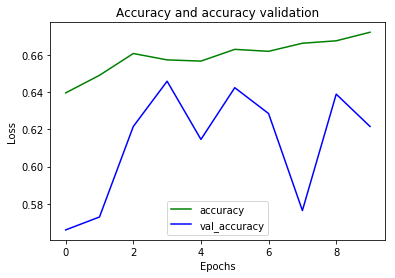

In [20]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
img = plt.gcf()
plt.plot(range(0,epochs), loss_train, 'g', label='accuracy')
plt.plot(range(0,epochs), loss_val, 'b', label='val_accuracy')
plt.title('Accuracy and accuracy validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
img.savefig('next_to_send/images_new_model/accuracy_third.png')

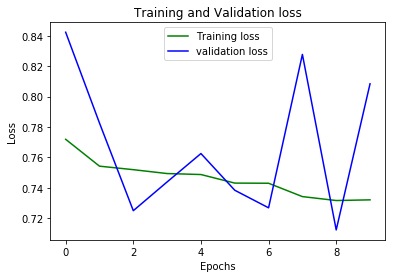

In [21]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
img = plt.gcf()
plt.plot(range(0,epochs), loss_train, 'g', label='Training loss')
plt.plot(range(0,epochs), loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

img.savefig('next_to_send/images_new_model/training_lost_third.png')

In [ ]:
#Una vez que se entrena, el modelo se guardara en el directorio especificado
dir = 'next_to_send/new_model/'+ str(datetime.datetime.now()) + '/'
if os.path.exists(dir) == False:
    os.mkdir(dir)
os.path.exists(dir)
cnn_new.save(dir + 'modelo.h5')
cnn_new.save_weights(dir  +'weights.h')

In [17]:
cnn_new= tf.keras.models.load_model('next_to_send/new_model/2020-02-09 06:59:15.983416/modelo.h5')